Q1 Generating 1000 Random Numbers

In [101]:
import pandas as pd
import numpy as np

In [102]:
x = (np.random.rand(1000)*100)
x= np.asarray(x,dtype='int')
y = x+np.random.normal(0,45,1000)
y= np.asarray(y,dtype='int')

In [103]:
x,y

(array([85, 87, 13, 99,  3,  3, 36, 80, 12, 23, 60, 81, 20, 50, 87,  6, 77,
        86, 32, 58, 97,  1, 35, 36, 49, 16, 42, 41,  1, 69, 28, 84, 22,  6,
        49, 40, 30, 47, 71, 32, 65, 33, 33, 93, 27, 77, 88, 18, 72,  7, 93,
         4, 99, 74,  1, 39, 65,  5, 11, 50, 46, 49, 96, 18,  0, 42, 34, 88,
        21,  1, 80, 47, 61, 65, 32, 32, 18,  2, 33, 47, 84, 74, 28, 47, 89,
        58, 68, 80, 20, 40, 74, 65, 19, 60, 61, 24, 26, 40, 51, 73, 76, 48,
        18, 43,  6, 80, 72, 76, 58, 72, 45, 59, 93, 18, 72, 61,  3, 72, 91,
        58, 44,  8,  8, 82, 23, 97, 44, 62, 23, 30, 16, 32, 55, 35, 56,  7,
        43,  9, 84, 61, 40,  3, 66, 88, 20, 68, 77, 50, 81, 73, 19, 49, 90,
        53, 13, 40, 14, 50, 67, 43, 25, 83,  1, 61, 25, 91, 14, 39, 75, 97,
        88, 78, 20, 44, 89, 41, 37, 83, 41, 63, 41, 38, 78, 38, 18, 80,  2,
        42, 54, 42, 61, 14, 90, 24,  3, 23, 42, 42, 55, 44, 69, 33, 89, 88,
        61, 22, 62, 30, 32, 72, 53, 51, 79, 25, 48, 59, 55, 41, 18, 27, 64,
        18, 

Q2 Linear Regression from scratch

In [104]:
inds = np.random.permutation(len(x))
size = round(len(x)*0.7)
train,test = inds[:size],inds[size:]

In [105]:
x_train,x_test,y_train,y_test = x[train],x[test],y[train],y[test]

In [106]:
m_scr = ((x_train-x_train.mean())*(y_train-y_train.mean())).sum()/((x_train-x_train.mean())**2).sum()
c_scr = y_train.mean()-(x_train.mean()*m_scr)
m_scr,c_scr

(1.0177826171056197, -0.4327037093842421)

In [107]:
y_pred_scr = c_scr + (m_scr*x_test)

In [108]:
def accuracy(y_pred,y_test):
    print("mae :",np.abs(y_test-y_pred).mean())
    print("rmse :",(((y_test-y_pred)**2).mean())**0.5)

In [109]:
accuracy(y_pred_scr,y_test)

mae : 35.92959369899332
rmse : 45.94004940426813


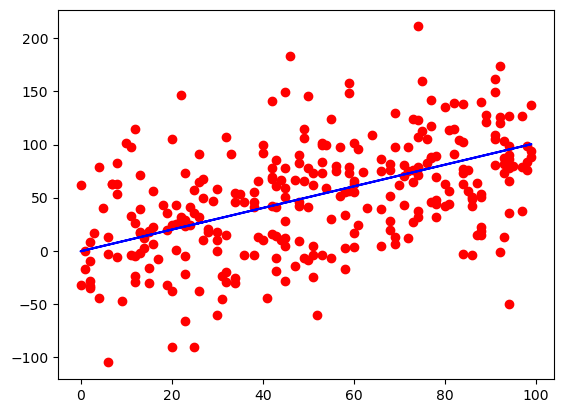

In [110]:
import matplotlib.pyplot as plt
plt.plot(x_test,y_pred_scr,c="b")
plt.scatter(x_test,y_test,c="r")

Q3 Gradient Descent

In [111]:
m_gd,c_gd = 0,0

In [112]:
l = 0.0001
epochs = 30000
n = float(len(x_train))

In [113]:
for i in range(epochs): 
    y_p= m_gd*x_train + c_gd
    D_m = (-2/n) * sum(x_train * (y_train - y_p))
    D_c = (-2/n) * sum(y_train - y_p)
    m_gd = m_gd - l * D_m
    c_gd = c_gd - l * D_c

In [114]:
m_gd,c_gd

(1.016220562046744, -0.3299463535503991)

In [115]:
y_pred_gd = m_gd*x_test + c_gd

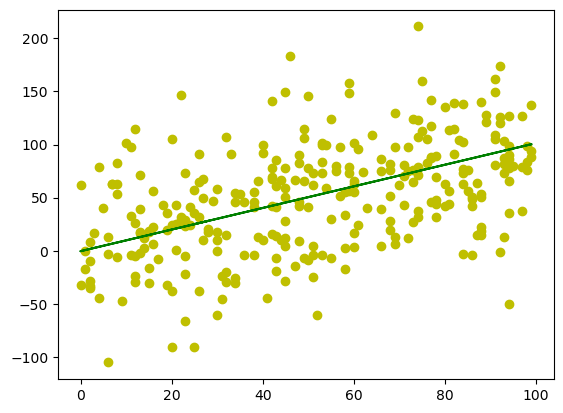

In [131]:
plt.plot(x_test,y_pred_gd,c="g")
plt.scatter(x_test,y_test,c="y")

In [117]:
accuracy(y_pred_gd,y_test)

mae : 35.92548881006043
rmse : 45.937262361862075


Q4 SKLearn Module

In [118]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

In [119]:
c_skl = reg.intercept_[0]
m_skl = reg.coef_[0,0]

In [120]:
y_pred_skl = reg.predict(x_test.reshape(-1,1))

In [121]:
accuracy(y_pred_skl,y_test)

mae : 47.90366692864159
rmse : 59.74223506784831


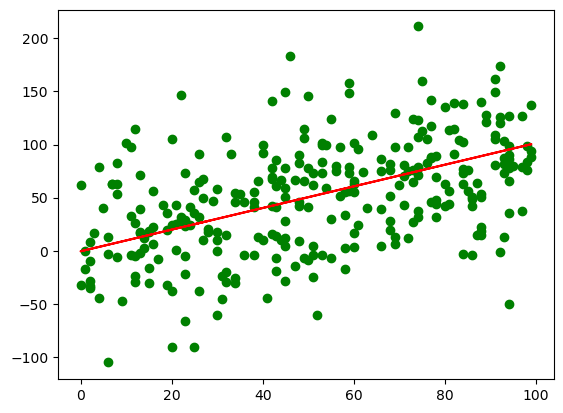

In [128]:
plt.scatter(x_test,y_test,c="g")
plt.plot(x_test,y_pred_skl,c="r")

In [124]:
print("Linear Reg from Scratch :")
print("\tSlope",m_scr)
print("\tIntercept:",c_scr)
print("Gradient Descent Method :")
print("\tSlope",m_gd)
print("\tIntercept:",c_gd)
print("SKLearn Method :")
print("\tSlope",m_skl)
print("\tIntercept:",c_skl)

Linear Reg from Scratch :
	Slope 1.0177826171056197
	Intercept: -0.4327037093842421
Gradient Descent Method :
	Slope 1.016220562046744
	Intercept: -0.3299463535503991
SKLearn Method :
	Slope 1.01778261710562
	Intercept: -0.4327037093842563
